## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

## The purpose of this notebook will be to investigate if academic performance can be predicted by socioeconomic factors. For the sake of this investigation, academic performance will be measured by using the average ACT score for each school.

#Data Sources

Data for this project is taken from EdGap.org. The data includes SAT and ACT scores from 2016, and the socioeconomic factors with the respective school districts. The secondary data set includes basic information about each school and is taken from the National Center for Education Statistics. Socioeconomic data is taken from the Census Bureau's American Community survey. SAT and ACT score data is taken from public data releases, and from each state's Department of Education.

The EdGap data can be found here: https://www.edgap.org/#5/37.892/-95.977

The secondary data set is linked here: https://drive.google.com/file/d/1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP/view?usp=sharing. and can be found here: https://nces.ed.gov/ccd/pubschuniv.asp

The file containing Data Preparation used for this notebook can be found here: https://github.com/eligunder/education-inequality/blob/main/educ_data_prep.ipynb

## Import libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
sns.set_theme(style='whitegrid')
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [177]:
test_df = pd.read_csv('https://raw.githubusercontent.com/eligunder/education-inequality/main/educ_test_data.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/eligunder/education-inequality/main/educ_train_data.csv')
merged_df = pd.read_csv('https://raw.githubusercontent.com/eligunder/education-inequality/main/educ_data_merged.csv')

##### $\rightarrow$ Review the contents of the data set.

In [178]:
test_df.count()

Unnamed: 0           1579
id                   1579
rate_unemployment    1579
percent_college      1579
percent_married      1579
median_income        1579
average_act          1579
percent_lunch        1579
state                1579
zip_code             1579
school_type          1579
school_level         1579
dtype: int64

In [179]:
test_df.describe()

,Unnamed: 0,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,zip_code
count,1579.000000,1.579000e+03,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,4071.962001,3.399561e+11,0.098129,0.568334,0.630228,52083.873149,20.248225,0.425223,44941.267891
std,2308.575869,1.342385e+11,0.059832,0.169742,0.197954,24139.676593,2.564825,0.241771,24811.498188
min,0.000000,1.000016e+11,0.000000,0.126230,-0.000708,659.823757,12.800000,0.000000,1001.000000
25%,2119.000000,2.200855e+11,0.057054,0.449587,0.517250,36666.000000,18.594872,0.242172,28155.500000
50%,4091.000000,3.600099e+11,0.085314,0.549898,0.666014,46996.000000,20.496947,0.391254,45333.000000
75%,6123.000000,4.703060e+11,0.123896,0.679062,0.775307,61165.000000,21.984127,0.583404,62770.500000
max,7895.000000,5.605695e+11,0.590278,0.985338,1.000000,196027.000000,32.362637,0.998729,99403.000000


In [180]:
train_df.count()

Unnamed: 0           6316
id                   6316
rate_unemployment    6316
percent_college      6316
percent_married      6316
median_income        6316
average_act          6316
percent_lunch        6316
state                6316
zip_code             6316
school_type          6316
school_level         6316
dtype: int64

In [181]:
train_df = train_df.drop("Unnamed: 0", axis=1)
train_df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,state,zip_code,school_type,school_level
0,181173001875,0.087075,0.513099,0.780523,41000.0,20.118437,0.420000,IN,47358,Regular School,High
1,174218004222,0.084129,0.854982,0.733639,57813.0,22.900000,0.160540,IL,60189,Regular School,High
2,341332004702,0.068251,0.654662,0.764706,73531.0,22.252747,0.102493,NJ,8742,Regular School,High
3,291383000625,0.062758,0.668880,0.469697,34381.0,18.100000,0.444444,MO,63042,Regular School,High
4,390441401069,0.070881,0.478367,0.478947,34273.0,19.000000,0.424242,OH,45638,Regular School,High


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

### 1. How do different socioeconomic factors impact ACT score?
#### a. Effect of the percentage of students on subsidized lunch on ACT score
#### b. Effect of Median Income on ACT Score
#### c. Effect of the percentage of residents who are college educated on ACT score


### 2. Can ACT score be predicted using a linear regression model, with socioeconomic factors as parameters?

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

## Top and Bottom 300 Zip Codes

### First, we will investigate the summary statistics of the top 300 zip codes, ranked by average ACT, and the bottom 300 zip codes. This analysis will help focus our investigation.

In [182]:
df_sorted = merged_df.sort_values(by='average_act')
top_300 = df_sorted.tail(300)['zip_code'].unique()
df_top_300 = merged_df[merged_df['zip_code'].isin(top_300)]

bottom_300 = df_sorted.head(300)['zip_code'].unique()
df_bottom_300 = merged_df[merged_df['zip_code'].isin(bottom_300)]

In [183]:
mean_top_300 = df_top_300.select_dtypes(include=['float64']).mean()
mean_bottom_300 = df_bottom_300.select_dtypes(include=['float64']).mean()

print("Averages for the top 300 zip codes:")
print(mean_top_300)

print("\nAverages for the bottom 300 zip codes:")
print(mean_bottom_300)

Averages for the top 300 zip codes:
rate_unemployment        0.079963
percent_college          0.755332
percent_married          0.701032
median_income        79628.750000
average_act             23.568493
percent_lunch            0.280151
dtype: float64

Averages for the bottom 300 zip codes:
rate_unemployment        0.169546
percent_college          0.483776
percent_married          0.404244
median_income        37151.326389
average_act             16.165298
percent_lunch            0.787833
dtype: float64


#### The bottom 300 zip codes on average have over twice the unemployment rate, about half of the median income, and has students nearly 3 times as likely to be on subsidized lunch, compared to the top 300 zip codes. From a preliminary analysis, there is likely some relationship between socioeconomic factors and Average ACT score.

## Effect of the percentage of students on subsidized lunch on ACT score

#### Given the drastic difference in subsidized lunch for the top 300 zip codes vs. the bottom 300 zip codes, this will be our first area of investigation. First, we will create a scatter plot to see if there is any obvious relationship between ACT score and percent lunch.

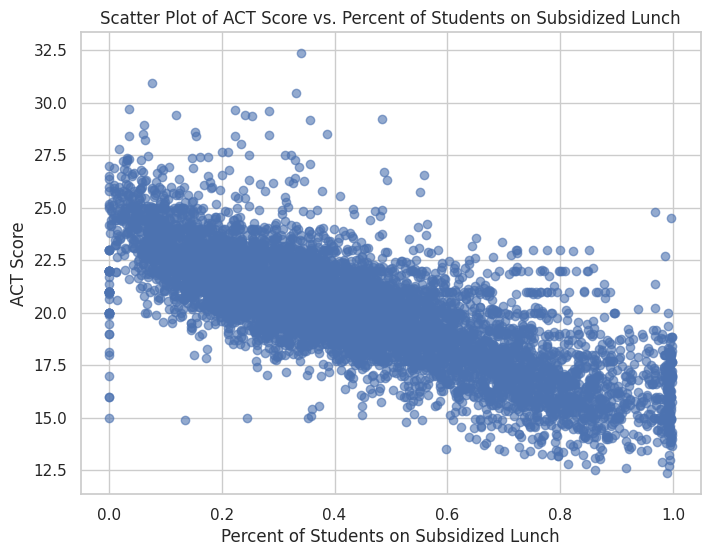

In [184]:

plt.figure(figsize=(8, 6))
plt.scatter(merged_df["percent_lunch"], merged_df["average_act"], alpha=0.6)
plt.title("Scatter Plot of ACT Score vs. Percent of Students on Subsidized Lunch")


plt.xlabel("Percent of Students on Subsidized Lunch")
plt.ylabel("ACT Score")
plt.grid(True)
plt.show()

#### This scatter plot reveals a clear relationship between percent lunch and ACT score, with higher percentages of students on subsidized lunch negatively impacting average ACT score. To further investigate this relationship, we will create histograms for different ranges of percent lunch

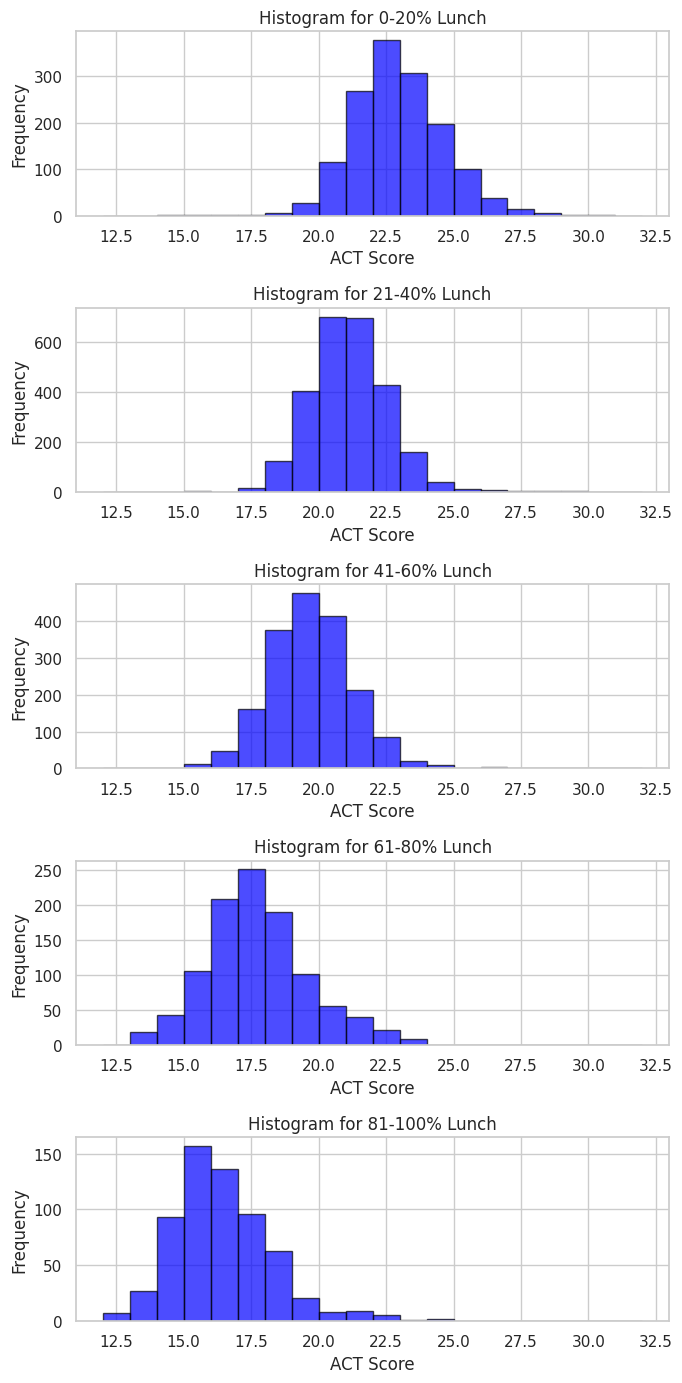

In [185]:

# Create ranges to separate histograms
percent_lunch_ranges = [(0, 0.20), (0.21, 0.40), (0.41, 0.60), (0.61, 0.80), (0.81, 1)]
percent_lunch_labels = ['0-20% Lunch', '21-40% Lunch', '41-60% Lunch', '61-80% Lunch', '81-100% Lunch']


fig, axs = plt.subplots(5, 1, figsize=(7, 14))
axs = axs.flatten()

min_act_score = int(merged_df['average_act'].min())
max_act_score = int(merged_df['average_act'].max())

act_scores = np.arange(min_act_score, max_act_score + 1)

# Iterate over buckets to create histograms
for idx, (lower, upper) in enumerate(percent_lunch_ranges):
    filtered_data = merged_df[(merged_df['percent_lunch'] >= lower) & (merged_df['percent_lunch'] <= upper)]

    axs[idx].hist(filtered_data['average_act'], bins=act_scores, alpha=0.7, color='blue', edgecolor='black')
    axs[idx].set_title(f'Histogram for {percent_lunch_labels[idx]}')
    axs[idx].set_xlabel('ACT Score')
    axs[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### The five histograms reveal significant differences in average ACT for schools with high percentages of students on subsidized lunch than those with lower amounts. The majority of schools with 0-20% of students on subsidized lunches have an average ACT of 22-24, while schools with 81-100% of students on subsidized lunches have average ACT scores mostly in the 14-18 range. The histograms for other percent_lunch scores show a clear trend, being that as the percentage of students on subsidized lunch increases, the distribution of average ACTs shifts leftward.

## Effect of Median Income on ACT Score

#### Like before, we will start out our investigation by making a scatter plot to see if there are any visible relationships between ACT score and median income. Median income was logged, in order to more clearly view the scatter plot.

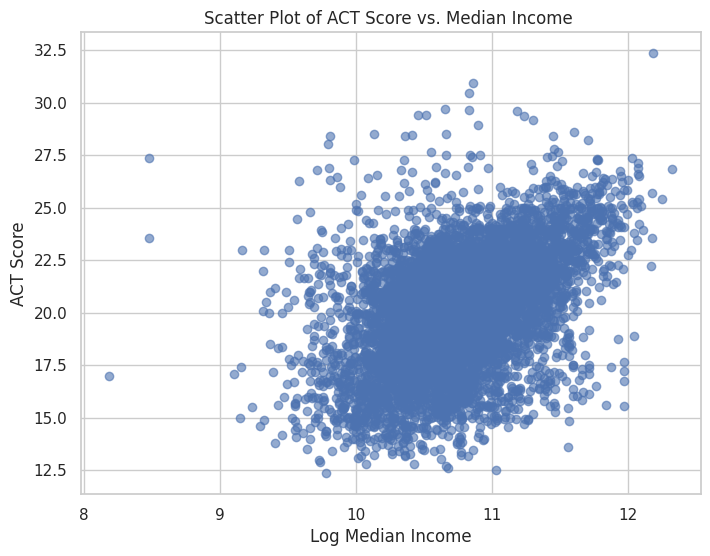

In [186]:
plt.figure(figsize=(8, 6))
plt.scatter(np.log(merged_df["median_income"]), merged_df["average_act"], alpha=0.6)
plt.title("Scatter Plot of ACT Score vs. Median Income ")


plt.xlabel("Log Median Income")
plt.ylabel("ACT Score")
plt.grid(True)
plt.show()

#### The scatter plot seems to show some relationship between median income and ACT score, albeit a relatively weak, one especially when compared to percent lunch. Like before, histograms will be used to further investigate this relationship. The histograms will be separated by income percentile.

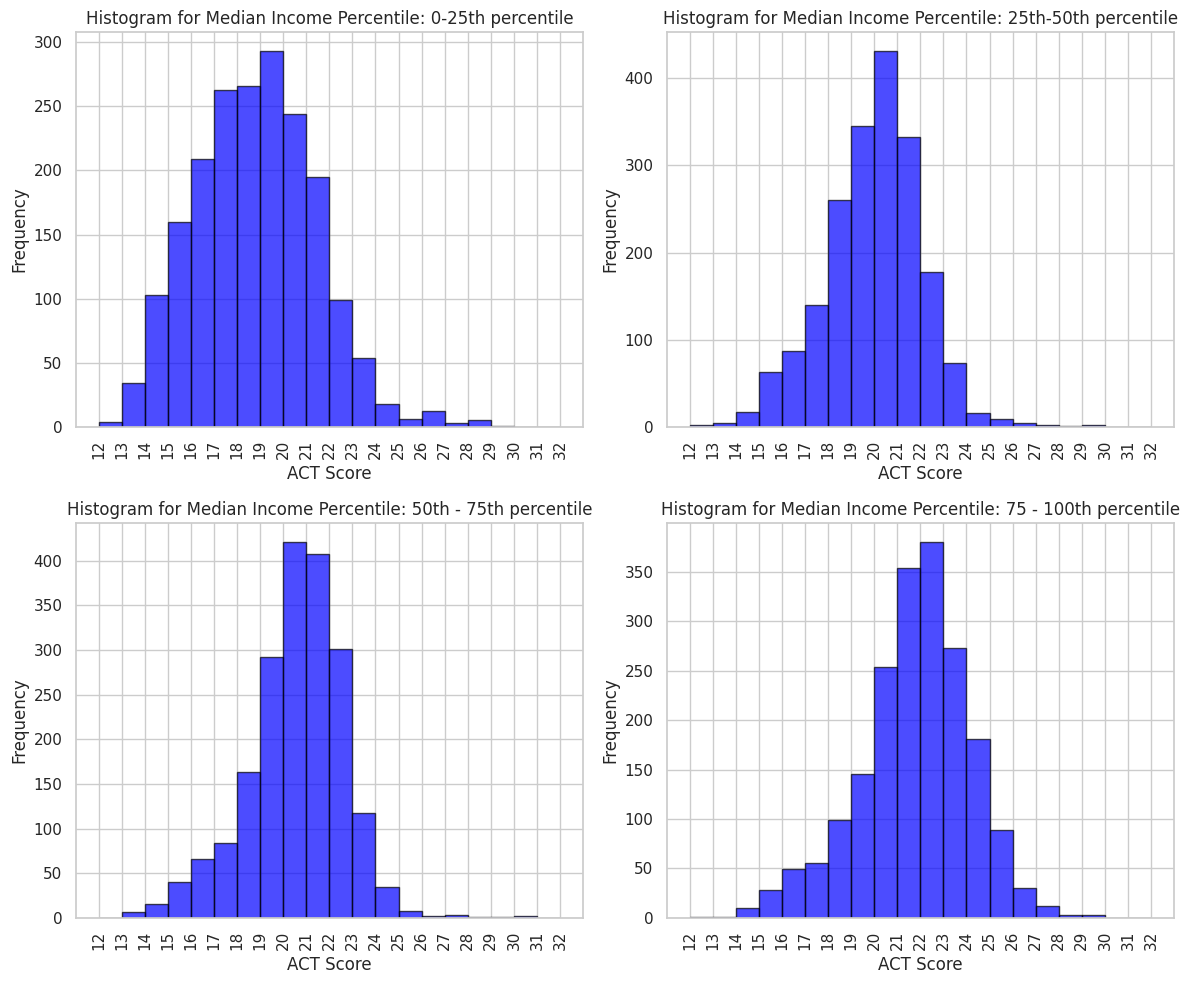

In [187]:

min_act_score = int(merged_df['average_act'].min())
max_act_score = int(merged_df['average_act'].max())

act_scores = np.arange(min_act_score, max_act_score + 1)

# Create percentile bins
median_income_percentile_ranges = [(0, 36796), (36796, 47011), (47012, 61530), (61531, 226181)]
percentile_labels = ['0-25th percentile', '25th-50th percentile', '50th - 75th percentile', '75 - 100th percentile']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Iterate over bins to create histograms
for idx, (lower, upper) in enumerate(median_income_percentile_ranges):
    filtered_data = merged_df[(merged_df['median_income'] >= lower) & (merged_df['median_income'] <= upper)]
    axs[idx].hist(filtered_data['average_act'], bins=act_scores, alpha=0.7, color='blue', edgecolor='black')
    axs[idx].set_title(f'Histogram for Median Income Percentile: {percentile_labels[idx]}')
    axs[idx].set_xlabel('ACT Score')
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_xticks(act_scores)
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


#### There are significant differences in the distribution of average ACT scores across the four histograms. The most significant differences occur for schools which have a median income below the 50th percentile. The mode for the 0-25th percentile is 2 points lower than the mode for schools in the 75th-100th percentile. Where this difference is most extreme is on the margins. Schools in the 75th - 100th percentile for median income have a significant part of their distribution in the 25+ ACT score bracket, relative to the other income percentiles. Meanwhile, schools in the 0-25th percentile have a significant part of their distribution in 15 and below ACT score bracket. This pattern is eludicated in the following bar charts.

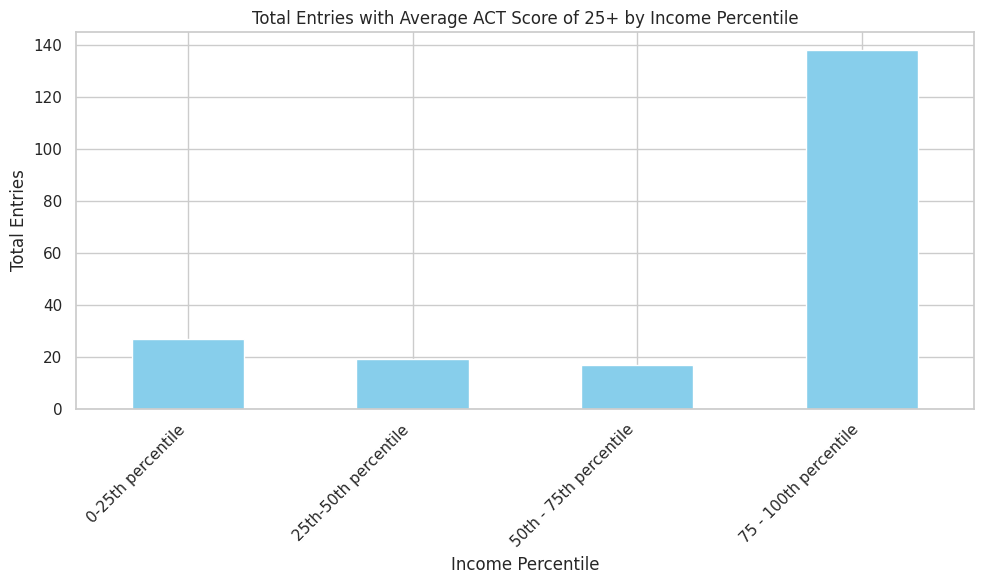

In [188]:
filtered_data = merged_df[merged_df['average_act'] >= 25]
grouped_data = filtered_data.groupby(pd.cut(filtered_data['median_income'], bins=[0, 36796, 47011, 61530, 226181], labels=percentile_labels)).size()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Entries with Average ACT Score of 25+ by Income Percentile')
plt.xlabel('Income Percentile')
plt.ylabel('Total Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The above bar chart demonstrates that a clear majority of schools with an average ACT score 25 and above are in the 75th-100th percentile for median income. Now let's look at the breakdown of schools with average ACT scores 15 and below:

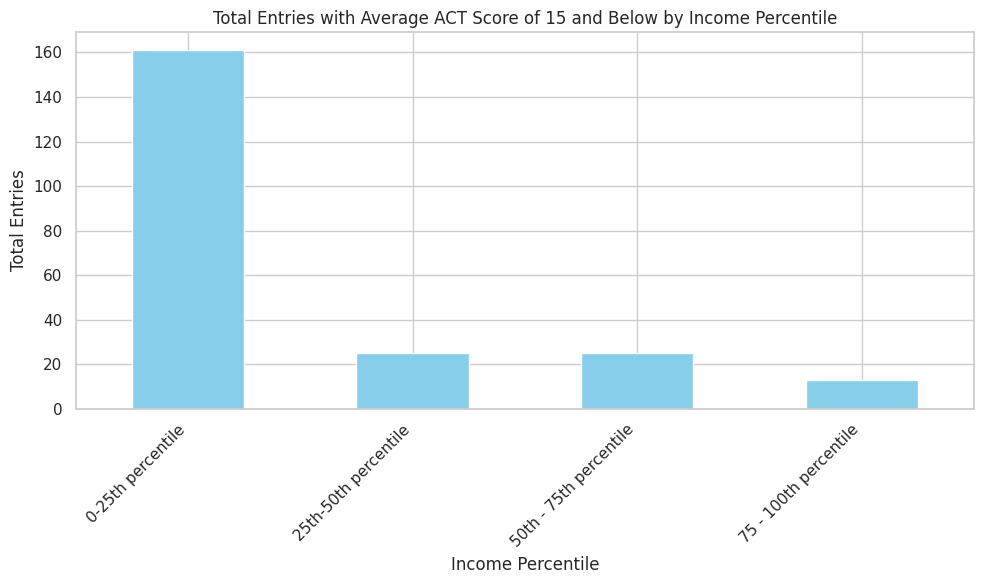

In [189]:

filtered_data = merged_df[merged_df['average_act'] <= 15]

grouped_data = filtered_data.groupby(pd.cut(filtered_data['median_income'], bins=[0, 36796, 47011, 61530, 226181], labels=percentile_labels)).size()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Entries with Average ACT Score of 15 and Below by Income Percentile')
plt.xlabel('Income Percentile')
plt.ylabel('Total Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Schools in the 0-25th percentile for median income are disproportionally represented in the list of schools with an average ACT score of 15 or below. Curiously, the other income percentiles are all represented about equally. This may show that once a certain median income percentile is reached, its effect on average ACT diminishes, especially ar the margins of ACT score distribution.

## Effect of the percentage of residents who are college educated on ACT score

#### To investigate this question, the schools are classified into ten buckets sorted by what percentage of their locality graduated college.

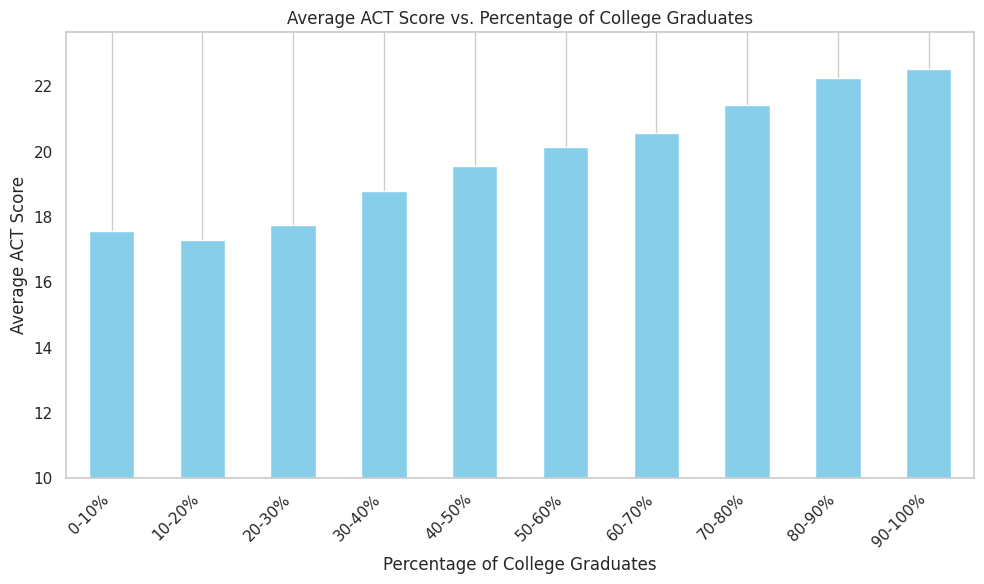

In [190]:
bucket_size = 0.1

# Create a new column to categorize percent_college into buckets
merged_df['percent_college_bucket'] = pd.cut(merged_df['percent_college'], bins=np.arange(0, 1.1, bucket_size), labels=[f'{i*10}-{(i+1)*10}%' for i in range(10)])

# Use new column to group by mean ACT
grouped_data = merged_df.groupby('percent_college_bucket')['average_act'].mean()


plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average ACT Score vs. Percentage of College Graduates')
plt.xlabel('Percentage of College Graduates')
plt.ylabel('Average ACT Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(10, None)
plt.show()

#### The above bar chart reveals that while there is no clear positive relationship between % of college graduates and Average ACT from 0-30% of college graduates, there is a relationship between average ACT and % of college graduates from 30% to 100%.

# Can ACT score be predicted using a linear regression model, with socioeconomic factors as parameters?

## First, we will chose fields which are relevant to socioeconomic status. This includes unemployment rate, percent college, percent married, median income, and percent lunch.

In [191]:
keep_cols = ['average_act','id','rate_unemployment', 	'percent_college' 	,'percent_married', 	'median_income',	'percent_lunch']

#### Assign feature variables and target variable (average ACT). The linear regression model will use the feature variables to attempt to predict average ACT.

In [192]:
features = [col for col in keep_cols if col != "average_act"]
target = ["average_act"]
X = train_df[features].values
y = train_df[target].values

X = np.hstack((np.ones_like(y), X))

#### Next, beta will be calculated which will be used in the equation which creates the linear regression.

In [193]:
beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))

## Simple Linear Regression

### First, we will use a simple linear regression model to attempt to predict the average ACT score.

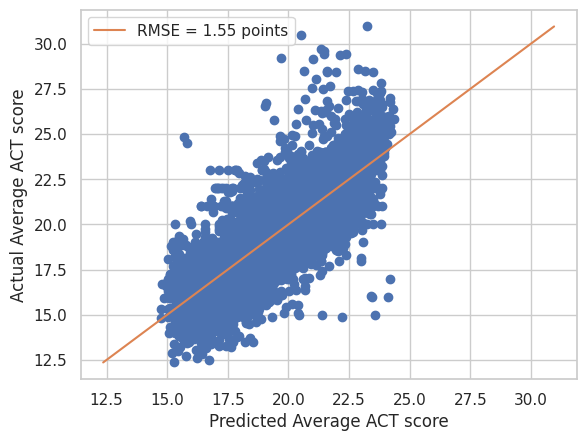

In [194]:

y_pred = np.matmul(X, beta)
one = np.linspace(y.min(), y.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y)**2))

fig, ax = plt.subplots()
ax.plot(y_pred, y, 'o')
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f} points")
ax.set_xlabel("Predicted Average ACT score")
ax.set_ylabel("Actual Average ACT score")
ax.legend()

#### The low root mean square error indicates that there is a linear relationship between socioeconomic factors and average ACT score. The closeness of the regression line to the actual ACT scores indicate a linear relationship. This will be explored further using a more advanced model. Next, we will check the coefficients of each variable to see how they influence ACT score.

In [195]:
for feature_name, coeff in zip(train_df[features].columns, beta.squeeze()[1:]):
  print(f"{feature_name}: {coeff:.7f}")

id: 0.0000000
rate_unemployment: -1.3190108
percent_college: 1.7165052
percent_married: -0.0729454
median_income: 0.0000000
percent_lunch: -7.6085384


#### Unemployment rate, and percent lunch have a strong negative impact on ACT score, while percent college has a strong positive impact on ACT score

## Boosted Regression Tree

#### A Boosted regression tree was chosen due to its ability to handle a large number of parameters, and its relatively high accuracy compared to other regression models which were tested on the data.

### To prepare for our next Linear Regression, we must normalize our data. First, we will remove the id column from our array.

In [196]:
X_without_one = X[:, 1:]

#### Then, we will normalize the data

In [197]:
X_norm = (X_without_one - np.mean(X_without_one, axis=0)) / np.std(X_without_one, axis=0)

#### Next, we will create the Boost Model and prediction

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y.squeeze(), test_size=0.3, random_state=54)
xgb = XGBRegressor(n_estimators=50, max_depth=5, learning_rate=1e-1)
xgb.fit(X_train, y_train)
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

#### Finally, we will plot the model

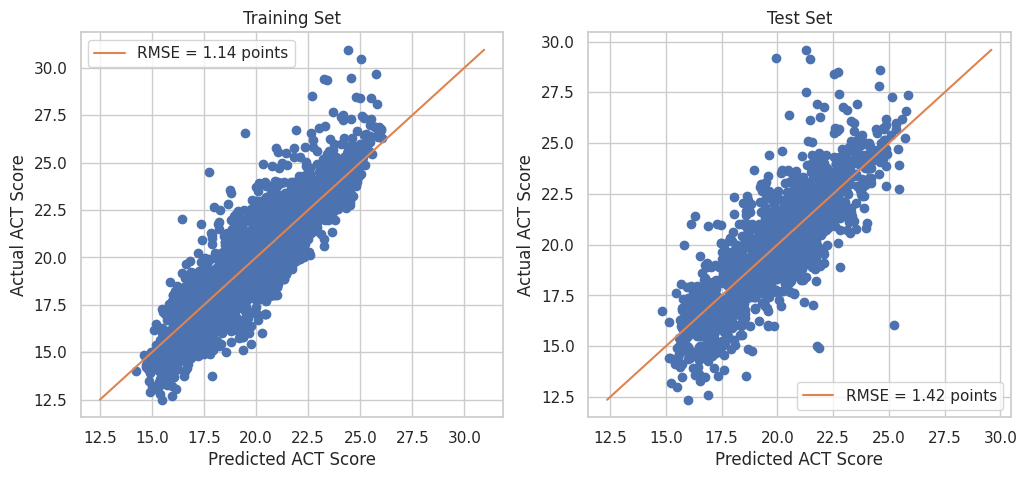

In [199]:
one_train = np.linspace(y_train.min(), y_train.max(), 100)
one_test = np.linspace(y_test.min(), y_test.max(), 100)

rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))

fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_train, y_train, 'o')
ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f} points")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted ACT Score")
ax1.set_ylabel("Actual ACT Score")
ax1.legend()

ax2.plot(y_pred_test, y_test, 'o')
ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f} points")
ax2.legend()
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted ACT Score")
ax2.set_ylabel("Actual ACT Score")
fig.set_size_inches(12, 5)

#### The model looks fairly accurate, indicating that there is a strong linear relationship between socioeconomic factors and ACT score. Finally, we will look at the R^2, a measure of how much variation in ACT score can be explained by the socioeconomic factors used as parameters in this model.

In [200]:
r2_train = r2_score(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)

print("R^2 for Training Set:", r2_train)
print("R^2 for Test Set:", r2_test)

R^2 for Training Set: 0.7928396092992256
R^2 for Test Set: 0.687723226865895


#### An R^2 of ~0.71 on the test set indicate a strong linear relationship between socioeconomic factors and ACT score.

In [201]:
booster = xgb.get_booster()
tree_df = booster.trees_to_dataframe()
tree_df.head()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f5,0.392299,0-1,0-2,0-2,11763.351600,4421.0,NaN
1,0,1,0-1,f5,-0.686403,0-3,0-4,0-4,2602.641850,3032.0,NaN
2,0,2,0-2,f5,1.016341,0-5,0-6,0-6,1274.154790,1389.0,NaN
3,0,3,0-3,f2,1.299128,0-7,0-8,0-8,806.363770,1201.0,NaN
4,0,4,0-4,f5,-0.131040,0-9,0-10,0-10,401.035034,1831.0,NaN


## Conclusion

Provide a brief description of your conclusions.

#### In conclusion, school performance can be predicted by socioeconomic factors. Furthermore, there is a strong linear relationship between ACT score and socioeconomic factors